# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *Vladislav Ishimtsev*</center>

Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import seaborn as sns
import networkx as nx
from pandas import DataFrame
from scipy.io import loadmat
from scipy.stats import spearmanr
from os import listdir
np.set_printoptions(precision=4)
%matplotlib inline

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results


In [2]:
# flickr.mat must be in current directory
data = loadmat('flickr.mat')
flickr = data['A']
names = data['names']
g = nx.from_scipy_sparse_matrix(flickr, create_using=nx.DiGraph())
top = 50
show_top = 5

#### <center/>Degree centrality

In [3]:
# array for total_degree, in_degree, out_degree
degree = np.array((np.array(nx.degree_centrality(g).values()),\
                np.array(nx.in_degree_centrality(g).values()),\
                np.array(nx.out_degree_centrality(g).values())))
if np.linalg.norm(degree[0] - degree[1] - degree[2]) > 1e-15:
    print 'ERROR!'
degree_top = degree.argsort()[:,-top:][:,::-1]

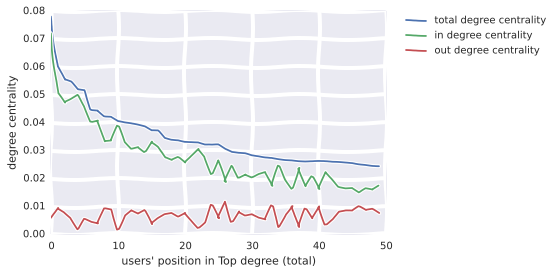

In [4]:
x = np.arange(top)
y = np.array([np.array(degree[0][degree_top[0]]),\
                np.array(degree[1][degree_top[0]]),\
                np.array(degree[2][degree_top[0]])])
plt.plot(x,y.T)
plt.xlabel("users' position in Top degree (total)")
plt.ylabel("degree centrality")
_=plt.legend(['total degree centrality','in degree centrality','out degree centrality'],\
             bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As we can see, the largest contribution to total degree centrality comes from _in_ _degree_ centrality. 

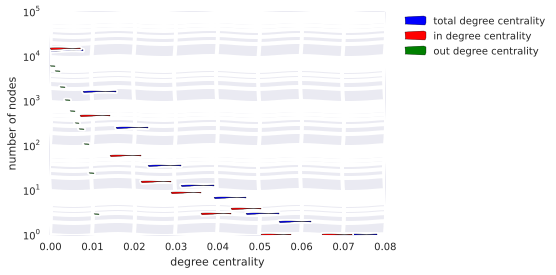

In [5]:
plt.hist(degree[0], color='b')
plt.hist(degree[1], color='r')
plt.hist(degree[2], color='g')
plt.yscale('log')
plt.xlabel("degree centrality")
plt.ylabel("number of nodes")
_=plt.legend(['total degree centrality','in degree centrality','out degree centrality'],\
             bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Plot shows that there is no nodes with big _out_ _degree_ centrality.

In [6]:
stat = [[ str(degree[j][degree_top[j][i]]) + ' -> ' + names[degree_top[j][i]]\
                                              for i in range(show_top)] for j in range(3)]

print 'Top '+str(show_top)+':\n    Inner:\n\t' + '\n\t'.join(stat[1])
print '    Outer:\n\t' + '\n\t'.join(stat[2])
print '    Total:\n\t' + '\n\t'.join(stat[0])

print 'Intersections between different Top' + str(top) + ':'
print '\tBetween Inner & Outer:\t' + str(len(np.intersect1d(degree_top[1],degree_top[2])))
print '\tBetween Inner & Total:\t' + str(len(np.intersect1d(degree_top[1],degree_top[0])))
print '\tBetween Outer & Total:\t' + str(len(np.intersect1d(degree_top[2],degree_top[0])))

Top 5:
    Inner:
	0.0721236405266 -> awfulsara                                           
	0.0505628696814 -> drp                                                 
	0.0499904598359 -> *Ivan*                                              
	0.0483368313935 -> antimethod                                          
	0.0470648095147 -> DrJoanne                                            
    Outer:
	0.0117662023787 -> anildash                                            
	0.0110665903454 -> tozzer                                              
	0.0108121859696 -> AtiRanA                                             
	0.0105577815938 -> pixietart                                           
	0.010366978312 -> jakedobkin                                          
    Total:
	0.0781021433569 -> awfulsara                                           
	0.0602302359601 -> drp                                                 
	0.0553329517268 -> DrJoanne                                            
	0.054506137

#### <center/>PageRank

In [7]:
pagerank = np.array(nx.pagerank(g).values())
pagerank_rand = np.array(nx.pagerank(g, alpha=0.3).values())
pagerank_top = pagerank.argsort()[-top:][::-1]
pagerank_rand_top = pagerank_rand.argsort()[-top:][::-1]

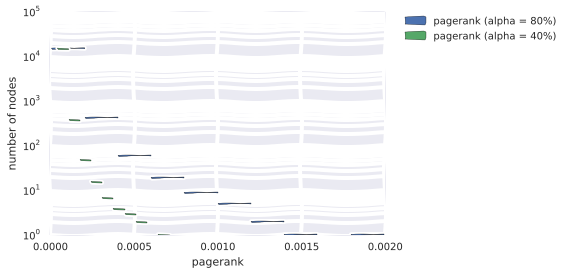

In [8]:
plt.hist(pagerank, label = 'pagerank (alpha = 80%)')
plt.hist(pagerank_rand, label = 'pagerank (alpha = 40%)')
plt.yscale('log')
plt.xlabel("pagerank")
plt.ylabel("number of nodes")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As expected, Top list of inner degree centrality is almost the same. Also, the plot structure kept after increasing randomicity.

In [9]:
stat = [ str(pagerank[pagerank_top[i]]) + ' -> ' + names[pagerank_top[i]] for i in range(show_top)]

print 'Top '+str(show_top)+' PageRank (alpha = 80%):\n\t' + '\n\t'.join(stat)
print 'Intersections with Inner degrees:\t' + str(len(np.intersect1d(degree_top[1],pagerank_top)))
print 'Intersections with Outer degrees:\t' + str(len(np.intersect1d(degree_top[2],pagerank_top)))
print 'Intersections with Total degrees:\t' + str(len(np.intersect1d(degree_top[0],pagerank_top)))

Top 5 PageRank (alpha = 80%):
	0.00199610405778 -> awfulsara                                           
	0.00143065428786 -> drp                                                 
	0.00134130573912 -> antimethod                                          
	0.00130786447137 -> BombDog                                             
	0.00119653145499 -> *Ivan*                                              
Intersections with Inner degrees:	43
Intersections with Outer degrees:	6
Intersections with Total degrees:	42


In [10]:
stat = [ str(pagerank_rand[pagerank_rand_top[i]]) + ' -> ' + names[pagerank_rand_top[i]] for i in range(show_top)]

print 'Top '+str(show_top)+' PageRank (alpha = 40%):\n\t' + '\n\t'.join(stat)
print 'Intersections with Inner degrees:\t' + str(len(np.intersect1d(degree_top[1],pagerank_rand_top)))
print 'Intersections with Outer degrees:\t' + str(len(np.intersect1d(degree_top[2],pagerank_rand_top)))
print 'Intersections with Total degrees:\t' + str(len(np.intersect1d(degree_top[0],pagerank_rand_top)))
print 'Intersections with Pagerank (alpha = 80%):\t' + str(len(np.intersect1d(pagerank_top,pagerank_rand_top)))

Top 5 PageRank (alpha = 40%):
	0.000715111969469 -> awfulsara                                           
	0.000545545866954 -> antimethod                                          
	0.000527240308223 -> MaD GiÂ®Lâ¢â¢                                     
	0.00049589434339 -> BombDog                                             
	0.000483600312801 -> *Ivan*                                              
Intersections with Inner degrees:	45
Intersections with Outer degrees:	5
Intersections with Total degrees:	40
Intersections with Pagerank (alpha = 80%):	46


We can conclude that increasing randomicity is not much impact on the PageRank (in the sense of relations between nodes).

#### <center/>Hubs and Authorities

In [11]:
buf = nx.hits(g)
hubs, auts = np.array(buf[0].values()),np.array(buf[1].values())
hubs_top = hubs.argsort()[-top:][::-1]
auts_top = auts.argsort()[-top:][::-1]

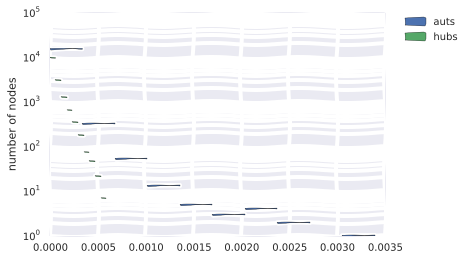

In [12]:
plt.hist(auts, label = 'auts')
plt.hist(hubs, label = 'hubs')
plt.yscale('log')
plt.ylabel("number of nodes")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
stat = [ str(hubs[hubs_top[i]]) + ' -> ' + names[hubs_top[i], ] for i in range(show_top)]
print 'Top '+str(show_top)+' Hubs:\n\t' + '\n\t'.join(stat)
stat = [ str(auts[auts_top[i]]) + ' -> ' + names[auts_top[i], ] for i in range(show_top)]
print 'Top '+str(show_top)+' Outs:\n\t' + '\n\t'.join(stat)

Top 5 Hubs:
	0.000589060455139 -> mrpiink                                             
	0.000585837904157 -> automat                                             
	0.000577658016738 -> schizoo23                                           
	0.00055872016857 -> lorrainemd                                          
	0.000550810713606 -> sgoralnick                                          
Top 5 Outs:
	0.00339652885621 -> awfulsara                                           
	0.00255993479745 -> drp                                                 
	0.00250711114245 -> DrJoanne                                            
	0.00224604143983 -> *Ivan*                                              
	0.00220053873489 -> antimethod                                          


#### <center/> Compare results

Now we need to confirm the findings that we found earlier.

In [14]:
compare = np.vstack((degree[0],degree[1],degree[2],pagerank,pagerank_rand,hubs,auts))
print 'Pearson correlation coefficient:' 
print np.corrcoef(compare)

Pearson correlation coefficient:
[[ 1.      0.9454  0.8584  0.9068  0.8995  0.6948  0.8647]
 [ 0.9454  1.      0.6443  0.9702  0.9718  0.5357  0.9319]
 [ 0.8584  0.6443  1.      0.6006  0.581   0.7871  0.5623]
 [ 0.9068  0.9702  0.6006  1.      0.9785  0.4895  0.8751]
 [ 0.8995  0.9718  0.581   0.9785  1.      0.4413  0.8579]
 [ 0.6948  0.5357  0.7871  0.4895  0.4413  1.      0.6075]
 [ 0.8647  0.9319  0.5623  0.8751  0.8579  0.6075  1.    ]]


PageRank has good correlation with inner degree centrality and not good with outer degree centrality.

As expected, hubs has good correlation with outer degree centrality, auts -- with inner degree centrality.

In [15]:
print 'Spearman rank correlation coefficient:' 
print np.array([[spearmanr(compare[i],compare[j])[0] for j in range(len(compare))] for i in range(5)])

Spearman rank correlation coefficient:
[[ 1.      0.9518  0.944   0.8887  0.8572  0.668   0.7866]
 [ 0.9518  1.      0.8143  0.9524  0.9281  0.534   0.7905]
 [ 0.944   0.8143  1.      0.7451  0.708   0.7327  0.7023]
 [ 0.8887  0.9524  0.7451  1.      0.9673  0.4388  0.6857]
 [ 0.8572  0.9281  0.708   0.9673  1.      0.3633  0.6198]]


As we can see, Spearman rank correlation coefficient is more sensitive to changes in the order of ranking (metrics PageRank with alpha = 80% and 40% are correlate to degree centrality less than the same in Pearson correlation coefficient). 

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://www.hse.ru/data/2016/03/05/1125656999/universities.zip) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [16]:
# directory with data must be in current directory
parent = 'universities/'
unis = [i[:-4] for i in listdir(parent) if '.mat' in i]
attrs = ['faculty', 'gender', 'major', 'minor', 'dorm/house', 'year', 'high school']
data = []

for x in unis:
    # loading friendship graph
    mat = loadmat(parent + x + '.mat')
    g = nx.from_scipy_sparse_matrix(mat['A'])
    info = mat['local_info'].T
    
    # set attributes
    for i,attr in enumerate(attrs):
        nx.set_node_attributes(g, attr, dict(enumerate(info[i])))
        
    data.append(g)
    print x,'\tOK'

Berkeley13 	OK
Caltech36 	OK
Harvard1 	OK
Oklahoma97 	OK
Princeton12 	OK
Texas80 	OK


At first, we need to compute node degree assortativity coefficient for all universities that we have. 

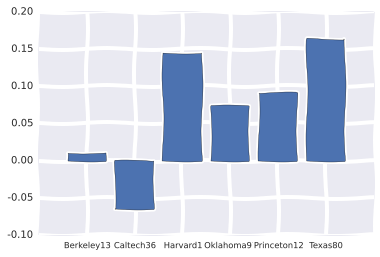

In [17]:
x = range(len(unis))
degree = [nx.degree_assortativity_coefficient(data[i]) for i in range(len(data))]
plt.bar(x, degree, align='center')
_=plt.xticks(x, unis,size='small')

So we do not have strong node degree assortativity coefficient. It means that in our case friendship graps has more star-like structure: high degree nodes also connected to low degree nodes.

Now let's calculate modularity for attributes of the nodes. All of this are categorical.

In [18]:
coefs = np.array([[nx.attribute_assortativity_coefficient(g,attr) for attr in attrs] for g in data])
df = DataFrame(coefs, columns=attrs, index=unis)
df

,faculty,gender,major,minor,dorm/house,year,high school
Berkeley13,0.274586,0.040923,0.058255,0.016561,0.147276,0.308121,0.077375
Caltech36,0.244079,0.046331,0.034719,0.010675,0.349153,0.237532,0.002670
Harvard1,0.542625,0.045270,0.049677,0.025227,0.125677,0.421160,0.023987
Oklahoma97,0.194643,0.092837,0.036379,0.012034,0.280335,0.201165,0.139468
Princeton12,0.482240,0.050611,0.054390,0.015189,0.094678,0.446745,0.018784
Texas80,0.288562,0.079693,0.059713,0.018847,0.204838,0.246195,0.147993


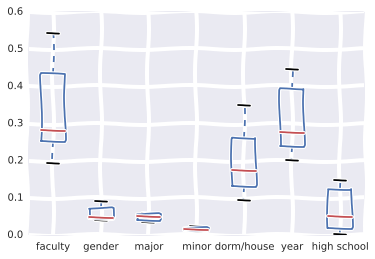

In [19]:
_=df.boxplot(return_type='dict')

As we can see, the most significant attributes (in sense of friendship) are faculty, dormitory and year. It look like the truth. Gender and major are not influence on friendship.